<h3><font color = darkgreen> Sohel Rana<br>
Student at GSASTC affiliated by HSTU, Baliadangi, Thakurgaon<br>
Registration: 1620125  - BSC(Engg) in CSE - 4th year<br>
Email: imsohel.ai.cse@gmail.com
    </font></h3>

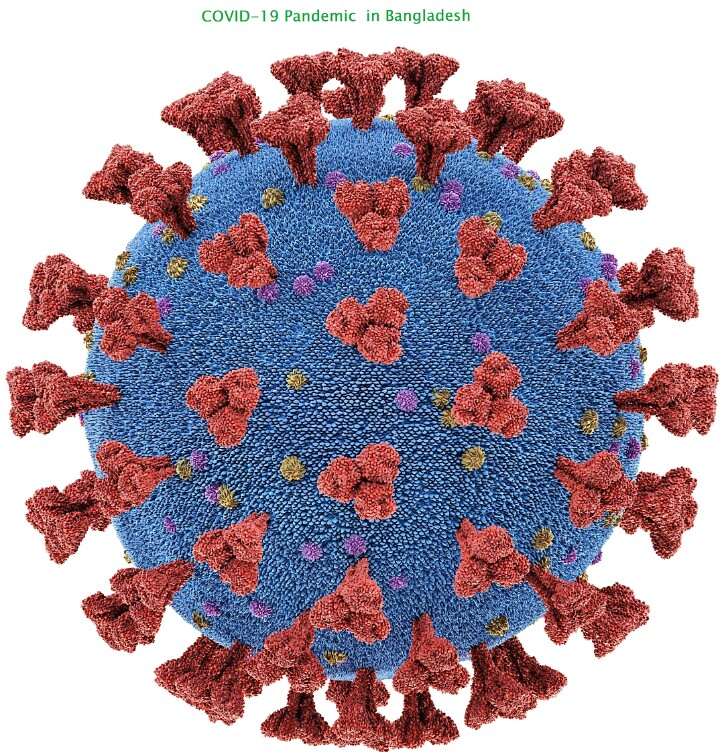

In [1]:
from IPython.display import Image
Image('covid1.jpg')

## importing the required libraries

In [2]:
import pandas as pd

# Visualisation libraries
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') # Above is a special style template for matplotlib, highly useful for visualizing time series data
%matplotlib inline

import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors

# Manipulating the default plot size
plt.rcParams['figure.figsize'] = 10, 12

# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 


In [3]:
df_confirmed= pd.read_csv('./world_data/New folder/time_series_covid_19_confirmed.csv')
df_deaths = pd.read_csv('./world_data/New folder/time_series_covid_19_deaths.csv')
df_recoveries = pd.read_csv('./world_data/New folder/time_series_covid_19_recovered.csv')

df_confirmed.rename(columns={'Country/Region':'Country'}, inplace=True)
df_recoveries.rename(columns={'Country/Region':'Country'}, inplace=True)
df_deaths.rename(columns={'Country/Region':'Country'}, inplace=True)


world_data = pd.read_csv('./world_data/covid_19_clean_complete.csv')
world_data.rename(columns={'ObservationDate':'Date', 'Country/Region':'Country'}, inplace=True)

df = pd.read_csv('./BD_data/COVID-19_in_bd.csv')

## Data analysing

In [4]:
# df_confirmed.head()
df_confirmed.tail()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20
261,NaN,Western Sahara,24.215500,-12.885800,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,6
262,NaN,Sao Tome and Principe,0.186360,6.613081,0,0,0,0,0,0,...,8,8,14,16,16,16,23,174,174,187
263,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,...,1,6,6,7,10,10,12,22,25,25
264,NaN,Comoros,-11.645500,43.333300,0,0,0,0,0,0,...,0,0,1,1,3,3,3,3,8,8
265,NaN,Tajikistan,38.861034,71.276093,0,0,0,0,0,0,...,0,0,15,15,76,128,230,293,379,461


In [5]:
# df_deaths.head()
df_deaths.shape

(266, 111)

In [6]:
df_recoveries.head()

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/28/20,4/29/20,4/30/20,5/1/20,5/2/20,5/3/20,5/4/20,5/5/20,5/6/20,5/7/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,228,252,260,310,331,345,397,421,458,468
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,431,455,470,488,519,531,543,570,595,605
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,1651,1702,1779,1821,1872,1936,1998,2067,2197,2323
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,398,423,468,468,472,493,499,514,521,526
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,6,7,7,11,11,11,11,11,11,11


In [7]:
# Italy 
italy = world_data[world_data['Country'] == "Italy"].reset_index(drop=True) 
# Active Cases in Italy 
italy['Active'] = italy['Confirmed'] - italy['Deaths'] - italy['Recovered']

In [8]:
world_data2 = world_data.groupby(["Date", "Country", "Province/State"])[['Date', 'Province/State', 'Country', 'Confirmed', 'Deaths', 'Recovered']].sum().reset_index()
world_data2.head()

,Date,Country,Province/State,Confirmed,Deaths,Recovered
0,02-01-20,Australia,Australian Capital Territory,0.0,0.0,0.0
1,02-01-20,Australia,From Diamond Princess,0.0,0.0,0.0
2,02-01-20,Australia,New South Wales,4.0,0.0,2.0
3,02-01-20,Australia,Northern Territory,0.0,0.0,0.0
4,02-01-20,Australia,Queensland,3.0,0.0,0.0


In [9]:
world_data.head() 

,Province/State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,1/22/20,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,1/22/20,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,1/22/20,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,1/22/20,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0.0,0.0,0.0


In [10]:
italy

,Province/State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
0,NaN,Italy,43.0,12.0,1/22/20,0.0,0.0,0.0,0.0
1,NaN,Italy,43.0,12.0,1/23/20,0.0,0.0,0.0,0.0
2,NaN,Italy,43.0,12.0,1/24/20,0.0,0.0,0.0,0.0
3,NaN,Italy,43.0,12.0,1/25/20,0.0,0.0,0.0,0.0
4,NaN,Italy,43.0,12.0,1/26/20,0.0,0.0,0.0,0.0
5,NaN,Italy,43.0,12.0,1/27/20,0.0,0.0,0.0,0.0
6,NaN,Italy,43.0,12.0,1/28/20,0.0,0.0,0.0,0.0
7,NaN,Italy,43.0,12.0,1/29/20,0.0,0.0,0.0,0.0
8,NaN,Italy,43.0,12.0,1/30/20,0.0,0.0,0.0,0.0
9,NaN,Italy,43.0,12.0,1/31/20,2.0,0.0,0.0,2.0


In [11]:
# Confirmed in 30 days 
italy['Confirmed'].max() 

59138.0

In [12]:
# Deaths in 30 days 
italy['Deaths'].max() 

5476.0

In [13]:
# Recovered in 30 days 
italy['Recovered'].max() 

7024.0

In [14]:
# Active in 30 days 
italy['Active'].max() 

46638.0

In [15]:
# For US 
us = world_data[world_data['Country'] == "US"].reset_index(drop=True) 
us['Active'] = us['Confirmed'] - us['Deaths'] - us['Recovered']

In [16]:
# us.head() 
us.tail()

,Province/State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active
3591,Puerto Rico,US,18.2208,-66.5901,3/23/20,23.0,1.0,0.0,22.0
3592,Guam,US,13.4443,144.7937,3/23/20,27.0,1.0,0.0,26.0
3593,Virgin Islands,US,18.3358,-64.8963,3/23/20,NaN,NaN,NaN,NaN
3594,United States Virgin Islands,US,18.3358,-64.8963,3/23/20,6.0,0.0,0.0,6.0
3595,US,US,37.0902,-95.7129,3/23/20,1.0,0.0,178.0,-177.0


In [17]:
us_30 = us.loc[:59]

In [18]:
# # us_30
# us

In [19]:
# Confirmed in 30 days 
us_30['Confirmed'].max() 

0.0

In [20]:
# Deaths in 30 days 
us_30['Deaths'].max() 

0.0

In [21]:
# Recovered in 30 days 
us_30['Recovered'].max() 

0.0

In [22]:
# Active in 30 days 
us_30['Active'].max() 

0.0

In [25]:
# For Spain 
spain = world_data[world_data['Country'] == "Spain"].reset_index(drop=True) 

In [26]:
spain_30 = spain.loc[:29]

In [27]:
spain_30

,Province/State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Spain,40.0,-4.0,1/22/20,0.0,0.0,0.0
1,NaN,Spain,40.0,-4.0,1/23/20,0.0,0.0,0.0
2,NaN,Spain,40.0,-4.0,1/24/20,0.0,0.0,0.0
3,NaN,Spain,40.0,-4.0,1/25/20,0.0,0.0,0.0
4,NaN,Spain,40.0,-4.0,1/26/20,0.0,0.0,0.0
5,NaN,Spain,40.0,-4.0,1/27/20,0.0,0.0,0.0
6,NaN,Spain,40.0,-4.0,1/28/20,0.0,0.0,0.0
7,NaN,Spain,40.0,-4.0,1/29/20,0.0,0.0,0.0
8,NaN,Spain,40.0,-4.0,1/30/20,0.0,0.0,0.0
9,NaN,Spain,40.0,-4.0,1/31/20,0.0,0.0,0.0


In [28]:
# Confirmed in 30 days 
spain_30['Confirmed'].max() 

2.0

In [29]:
# Deaths in 30 days 
spain_30['Deaths'].max() 

0.0

In [30]:
# Recovered 
spain_30['Recovered'].max() 

2.0

## Forcasting the Confirmation Cases

In [23]:
cols = df_confirmed.keys()

In [24]:
confirmed = df_confirmed.loc[:, cols[4]:cols[-1]]
deaths = df_deaths.loc[:, cols[4]:cols[-1]]
recoveries = df_recoveries.loc[:, cols[4]:cols[-1]]

In [25]:
dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 
 
bd_cases = [] 

for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    
    # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)

    # case studies 
    bd_cases.append(df_confirmed[df_confirmed['Country'] == 'Bangladesh'][i].sum())

In [26]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

world_daily_increase = daily_increase(world_cases)

bd_daily_increase = daily_increase(bd_cases)

In [27]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)

In [30]:
print(np.array(bd_daily_increase))


print(np.array(bd_cases))

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   3   0   0   0   0   0   0   2
   3   2   4   3   3   5   2   6   6   0   5   4   0   0   1   2   3   2
   5   9  18  35  41  54 112  94  58 139 182 209 219 341 266 306 312 492
 434 390 414 503 309 418 497 549 641 564 571 552 665 688 786 790 706]
[    0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     0     0
     0     0     0     0     0     0     0     0     0     0     3     3
     3     3     3     3     3     5     8    10    14    17    20    25
    27    33    39    39    44    48    48    48    49    51    54    56
    61    70    88   123   164   218   330   424   482   621   803  1012
  1231  1572  1838  2144  2456  2948  3382  3772  4186

In [31]:
days_in_future = 30
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
adjusted_dates = future_forcast[:-30]

In [32]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

## Train data

In [33]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, bd_cases, test_size=0.2, shuffle=False)

## Working with SVM Model

In [34]:
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=6, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)

## check against testing data

MAE: 5332.37351715471
MSE: 37063007.962011725


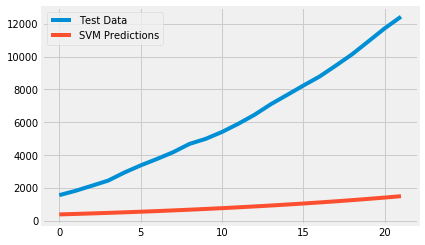

In [42]:
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

## Transform our data for polynomial regression

In [35]:
poly = PolynomialFeatures(degree=5)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)

In [36]:
# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 946.5478166649759
MSE: 985097.4550360728


In [37]:
print(linear_model.coef_)

[-6.10501950e+01  2.96397831e+01 -3.04055274e+00  1.15036663e-01
 -1.80651442e-03  1.00121589e-05]


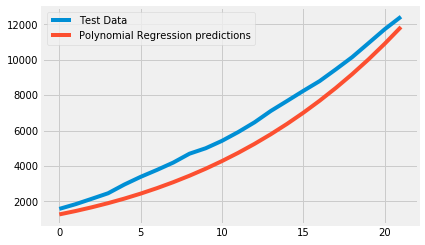

In [38]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression predictions'])

## bayesian ridge polynomial regression

In [39]:

tol = [1e-4, 1e-3, 1e-2]
alpha_1 = [1e-7, 1e-6, 1e-5, 1e-4]
alpha_2 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_1 = [1e-7, 1e-6, 1e-5, 1e-4]
lambda_2 = [1e-7, 1e-6, 1e-5, 1e-4]

bayesian_grid = {'tol': tol, 'alpha_1': alpha_1, 'alpha_2' : alpha_2, 'lambda_1': lambda_1, 'lambda_2' : lambda_2}

bayesian = BayesianRidge(fit_intercept=False, normalize=True)
bayesian_search = RandomizedSearchCV(bayesian, bayesian_grid, scoring='neg_mean_squared_error', cv=3, return_train_score=True, n_jobs=-1, n_iter=40, verbose=1)
bayesian_search.fit(poly_X_train_confirmed, y_train_confirmed)

Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    4.3s finished
C:\Users\SOHEL RANA\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=BayesianRidge(alpha_1=1e-06, alpha_2=1e-06,
                                           compute_score=False, copy_X=True,
                                           fit_intercept=False, lambda_1=1e-06,
                                           lambda_2=1e-06, n_iter=300,
                                           normalize=True, tol=0.001,
                                           verbose=False),
                   iid='warn', n_iter=40, n_jobs=-1,
                   param_distributions={'alpha_1': [1e-07, 1e-06, 1e-05,
                                                    0.0001],
                                        'alpha_2': [1e-07, 1e-06, 1e-05,
                                                    0.0001],
                                        'lambda_1': [1e-07, 1e-06, 1e-05,
                                                     0.0001],
                                        'lambda_2': [1e

In [48]:
bayesian_search.best_params_

{'tol': 0.01,
 'lambda_2': 0.0001,
 'lambda_1': 1e-06,
 'alpha_2': 1e-05,
 'alpha_1': 0.0001}

In [40]:
bayesian_confirmed = bayesian_search.best_estimator_
test_bayesian_pred = bayesian_confirmed.predict(poly_X_test_confirmed)
bayesian_pred = bayesian_confirmed.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_bayesian_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_bayesian_pred, y_test_confirmed))

MAE: 1809.0115975026217
MSE: 3917813.3885478545


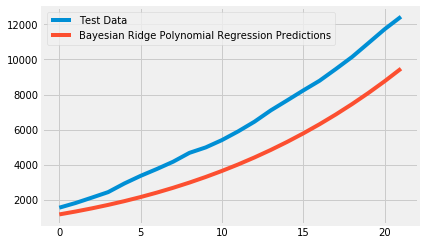

In [41]:
plt.plot(y_test_confirmed)
plt.plot(test_bayesian_pred)
plt.legend(['Test Data', 'Bayesian Ridge Polynomial Regression Predictions'])

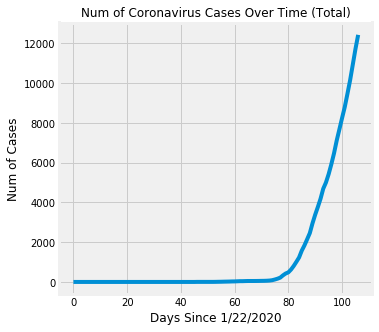

In [43]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(5, 5))
plt.plot(adjusted_dates, bd_cases)
plt.title('Num of Coronavirus Cases Over Time (Total)', size=12)
plt.xlabel('Days Since 1/22/2020', size=12)
plt.ylabel('Num of Cases', size=12)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

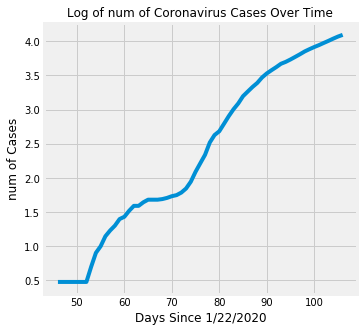

In [44]:
plt.figure(figsize=(5, 5))
plt.plot(adjusted_dates, np.log10(bd_cases))
plt.title('Log of num of Coronavirus Cases Over Time', size=12)
plt.xlabel('Days Since 1/22/2020', size=12)
plt.ylabel('num of Cases', size=12)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

## BD Daily Increases in Confirmed Cases

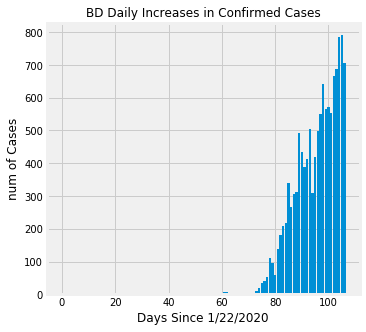

In [45]:
plt.figure(figsize=(5, 5))
plt.bar(adjusted_dates, bd_daily_increase)
plt.title('BD Daily Increases in Confirmed Cases', size=12)
plt.xlabel('Days Since 1/22/2020', size=12)
plt.ylabel('num of Cases', size=12)
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

## SVM Predictions visualization

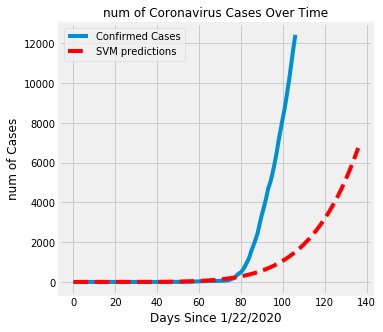

In [46]:
plt.figure(figsize=(5, 5))
plt.plot(adjusted_dates, bd_cases)
plt.plot(future_forcast, svm_pred, linestyle='dashed', color='red')
plt.title('num of Coronavirus Cases Over Time', size=12)
plt.xlabel('Days Since 1/22/2020', size=12)
plt.ylabel('num of Cases', size=12)
plt.legend(['Confirmed Cases', 'SVM predictions'], prop={'size': 10})
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

## Polynomial Regression Predictions visualization

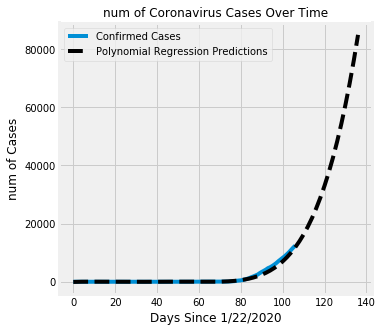

In [47]:
plt.figure(figsize=(5, 5))
plt.plot(adjusted_dates, bd_cases)
plt.plot(future_forcast, linear_pred, linestyle='dashed', color='black')
plt.title('num of Coronavirus Cases Over Time', size=12)
plt.xlabel('Days Since 1/22/2020', size=12)
plt.ylabel('num of Cases', size=12)
plt.legend(['Confirmed Cases', 'Polynomial Regression Predictions'], prop={'size': 10})
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

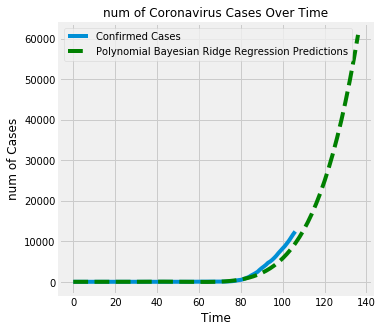

In [56]:
plt.figure(figsize=(5, 5))
plt.plot(adjusted_dates, bd_cases)
plt.plot(future_forcast, bayesian_pred, linestyle='dashed', color='green')
plt.title('num of Coronavirus Cases Over Time', size=12)
plt.xlabel('Time', size=12)
plt.ylabel('num of Cases', size=12)
plt.legend(['Confirmed Cases', 'Polynomial Bayesian Ridge Regression Predictions'], prop={'size': 10})
plt.xticks(size=10)
plt.yticks(size=10)
plt.show()

In [48]:
# Future predictions using SVM 
print('SVM future predictions for next 30 days:')
set(zip(future_forcast_dates[-30:], np.round(svm_pred[-30:])))

SVM future predictions for next 30 days:


{('05/08/2020', 1597.0),
 ('05/09/2020', 1688.0),
 ('05/10/2020', 1784.0),
 ('05/11/2020', 1885.0),
 ('05/12/2020', 1990.0),
 ('05/13/2020', 2100.0),
 ('05/14/2020', 2215.0),
 ('05/15/2020', 2336.0),
 ('05/16/2020', 2461.0),
 ('05/17/2020', 2592.0),
 ('05/18/2020', 2730.0),
 ('05/19/2020', 2873.0),
 ('05/20/2020', 3022.0),
 ('05/21/2020', 3177.0),
 ('05/22/2020', 3340.0),
 ('05/23/2020', 3509.0),
 ('05/24/2020', 3685.0),
 ('05/25/2020', 3868.0),
 ('05/26/2020', 4059.0),
 ('05/27/2020', 4258.0),
 ('05/28/2020', 4465.0),
 ('05/29/2020', 4680.0),
 ('05/30/2020', 4904.0),
 ('05/31/2020', 5137.0),
 ('06/01/2020', 5378.0),
 ('06/02/2020', 5630.0),
 ('06/03/2020', 5890.0),
 ('06/04/2020', 6161.0),
 ('06/05/2020', 6442.0),
 ('06/06/2020', 6734.0)}

In [49]:
# Future predictions using Polynomial Regression 
linear_pred = linear_pred.reshape(1,-1)[0]
print('Polynomial regression future predictions for next 30 days:')
set(zip(future_forcast_dates[-30:], np.round(linear_pred[-30:])))

Polynomial regression future predictions for next 30 days:


{('05/08/2020', 12852.0),
 ('05/09/2020', 13925.0),
 ('05/10/2020', 15066.0),
 ('05/11/2020', 16277.0),
 ('05/12/2020', 17563.0),
 ('05/13/2020', 18926.0),
 ('05/14/2020', 20370.0),
 ('05/15/2020', 21897.0),
 ('05/16/2020', 23512.0),
 ('05/17/2020', 25219.0),
 ('05/18/2020', 27020.0),
 ('05/19/2020', 28920.0),
 ('05/20/2020', 30922.0),
 ('05/21/2020', 33031.0),
 ('05/22/2020', 35250.0),
 ('05/23/2020', 37585.0),
 ('05/24/2020', 40038.0),
 ('05/25/2020', 42615.0),
 ('05/26/2020', 45320.0),
 ('05/27/2020', 48157.0),
 ('05/28/2020', 51132.0),
 ('05/29/2020', 54248.0),
 ('05/30/2020', 57512.0),
 ('05/31/2020', 60928.0),
 ('06/01/2020', 64501.0),
 ('06/02/2020', 68237.0),
 ('06/03/2020', 72141.0),
 ('06/04/2020', 76217.0),
 ('06/05/2020', 80473.0),
 ('06/06/2020', 84914.0)}

In [50]:
# Future predictions using Linear Regression 
print('Ridge regression future predictions for next 30 days:')
set(zip(future_forcast_dates[-30:], np.round(bayesian_pred[-30:])))

Ridge regression future predictions for next 30 days:


{('05/08/2020', 10226.0),
 ('05/09/2020', 11025.0),
 ('05/10/2020', 11870.0),
 ('05/11/2020', 12765.0),
 ('05/12/2020', 13711.0),
 ('05/13/2020', 14710.0),
 ('05/14/2020', 15763.0),
 ('05/15/2020', 16875.0),
 ('05/16/2020', 18046.0),
 ('05/17/2020', 19278.0),
 ('05/18/2020', 20575.0),
 ('05/19/2020', 21939.0),
 ('05/20/2020', 23372.0),
 ('05/21/2020', 24876.0),
 ('05/22/2020', 26455.0),
 ('05/23/2020', 28110.0),
 ('05/24/2020', 29845.0),
 ('05/25/2020', 31662.0),
 ('05/26/2020', 33564.0),
 ('05/27/2020', 35554.0),
 ('05/28/2020', 37634.0),
 ('05/29/2020', 39809.0),
 ('05/30/2020', 42081.0),
 ('05/31/2020', 44452.0),
 ('06/01/2020', 46927.0),
 ('06/02/2020', 49509.0),
 ('06/03/2020', 52200.0),
 ('06/04/2020', 55005.0),
 ('06/05/2020', 57926.0),
 ('06/06/2020', 60968.0)}

In [51]:
print(mortality_rate)

[0.03063063063063063, 0.027522935779816515, 0.02763018065887354, 0.029288702928870293, 0.02644003777148253, 0.02801503245644004, 0.023485120114736465, 0.021569899448589037, 0.020767549186300704, 0.021456633423995165, 0.021515201860774213, 0.021564305712753917, 0.02142749358684171, 0.02059266700150678, 0.020408901755020806, 0.020588426316814963, 0.020906632549213457, 0.021713362068965517, 0.0225653798256538, 0.023689256816799963, 0.02484264095352886, 0.02472302691227527, 0.022710707659687253, 0.022770426852059506, 0.02413443430392583, 0.024851173761653376, 0.02549892161948183, 0.026711563032367974, 0.028054310606962018, 0.02948934997440844, 0.029302646480688373, 0.03128340884793565, 0.03126978900174777, 0.03304382800618393, 0.03367907867572072, 0.03403450140069789, 0.034007686172141255, 0.034144949591021496, 0.03419330085686714, 0.03390329187837364, 0.03416162824175581, 0.034037052994398964, 0.0342094196804037, 0.03419283656498376, 0.03397805522539071, 0.033614556860373936, 0.0346108667

## <font color='red'>Please follow ther rules of government and stay safe.</font>